# Model project

**A short introduktion.!!!!!!**

The paper will follow the structure below:
1. Model description 
2. Analysis 
3. Solution
4. Model expansion
5. Conclusion

# Model description

This sections aims to describe the OLG model and build upon it with the implementation of a pay as you go system. We describe the capital accumulation, population growth, firm's profit maximization and household utility and budget constraints. Then we will solve the household maximization problem and find the optimal savings and capital accumulation and finally find the steady state of the model.

## Capital accumulation

The OLG model consists of two periods and two groups: young and old. The production function is a standard Cobb-Douglas function:
$$
Y_{t}=AK_{t}^{\alpha}L_{t}^{1-\alpha}
$$


Capital accumulation is driven by the savings within the economy, contributed exclusively by the young:

$$
K_{t+1} = s_t L_t
$$



## Population growth
The labor force grows at a constant rate n:

$$
L_{t+1} = L_t (1 + n)
$$

## Firm's profit maximization
Firms aim to maximize their profits:

$$
\max_{K_t, L_t} \quad A K_t^\alpha L_t^{1-\alpha} - r_t K_t - w_t L_t
$$

where $r_t$ and $w_t$ are the factor prices. The standard solutions for factor prices in a Cobb-Douglas production function are:

$$
r_t = A \alpha k_t^{\alpha - 1}
$$

$$
w_t = A (1 - \alpha) k_t^\alpha
$$

with $A > 0$ being the factor productivity and $k_t$ being capital per worker, defined as $k_t = \frac{K_t}{L_t}$.



## Household utility and budget constraints
Individuals derive utility from consumption:

$$
U_t = \ln(c_{1t}) + \beta \ln(c_{2t+1})
$$

where $c_{1t}$ is consumption when young and $c_{2t+1}$ is consumption when old. The discount factor $\beta = \frac{1}{1 + \rho}$, with $\rho > -1$, ensures that $\beta$ is positive.

The budget constraints for the young and old are:

$$
c_{1t} + s_t = w_t
$$

$$
c_{2t+1} = (1 + r_{t+1}) s_t
$$

Young individuals consume their wages minus their savings, while the old consume their savings plus interest. This results in the lifetime budget constraint:

$$
c_{1t} + \frac{c_{2t+1}}{1 + r_{t+1}} = w_t
$$



## Solving the household maximization problem
To solve the household's utility maximization problem:

$$
\max_{c_{1t}, c_{2t+1}} \quad \ln(c_{1t}) + \beta \ln(c_{2t+1}) \quad \text{s.t.} \quad c_{1t} + \frac{c_{2t+1}}{1 + r_{t+1}} = w_t
$$

We use the Lagrangian method, resulting in the Euler equation:

$$
c_{2t+1} = \frac{1 + r_{t+1}}{1 + \rho} c_{1t}
$$



## Optimal savings and capital accumulation
Combining the Euler equation with the budget constraints, we find the optimal savings:

$$
s_t = \frac{1}{2 + \rho} w_t
$$

Given that $s_t = k_{t+1} (1 + n)$, we derive the capital accumulation per capita:

$$
k_{t+1} (1 + n) = \frac{1}{2 + \rho} w_t
$$

This simplifies to:

$$
k_{t+1} = \frac{A (1 - \alpha) k_t^\alpha}{(1 + n)(2 + \rho)}
$$

## Steady state
At the steady state, where $k_{t+1} = k_t = k^*$:

$$
k^* = \left(\frac{A (1 - \alpha)}{(1 + n)(2 + \rho)}\right)^{\frac{1}{1 - \alpha}}
$$

This completes the OLG model, showing how capital accumulates and the steady-state capital per worker is derived considering the savings behavior of the young and the factor prices in the economy.


# Analysis

We start by importing the necesarry packages, then defining the relevant parameters into symbolic variables and then we solve for steady state.


In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import pandas as pd
from ipywidgets import interact, FloatSlider
import time
from scipy.optimize import root_scalar
import ipywidgets as widgets
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [2]:
alpha = sm.symbols('alpha')
rho =  sm.symbols('rho')
k = sm.symbols('k')
n = sm.symbols('n')
A = sm.symbols('A')
tau = sm.symbols('tau')

In [9]:
#We create a dataframe containing the relevant parameters and their respective values. It then rounds the values to two decimals 
#and displays the dataframe.
parameters = {
    'Parameter': ['alpha', 'rho', 'n', 'A','tau'],
    'Value': [1/3, 0.05, 0.06, 1, 0]
}
df = pd.DataFrame(parameters)
df['Value'] = df['Value'].round(2)
df

,Parameter,Value
0,alpha,0.33
1,rho,0.05
2,n,0.06
3,A,1.00
4,tau,0.00


$\alpha$ represents the share of output attributed to capital. The value 0.33 is empirically observed as a reasonable estimate for the capital share of income in many economies.

$\rho$ is the discount rate reflecting the time preference of individuals. It indicates how future utility or consumption is valued relative to present utility or consumption. The value of 5% is a typical assumption to reflect moderate time preference, meaning individuals moderately prefer current consumption over future consumption.

$n$ is the population growth rate. In the OLG model, this parameter affects the growth of the labor force and, consequently, the capital per worker and output per worker over time. A 6% growth rate is considered high by contemporary global standards, where many developed countries have growth rates below 2%. Therefore n reflects a high population growth rate in our model.

$A$ represents total factor productivity, a measure of the efficiency with which capital and labor are used to produce output. Setting 
A to 1 normalizes the model, making it easier to isolate and analyze the effects of other variables and parameters.

$\tau$ can represent taxes, subsidies, or other policy-related parameters. A value of 0 implies a baseline scenario without taxes or subsidies.

We now set up the steady state condition and solve for for $k$:

In [4]:
ss = sm.Eq(k, (A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))
ss

Eq(k, A*k**alpha*(1 - alpha)/((n + 1)*(rho + 2)))

In [5]:
ss_solve = sm.solve(ss, k)[0]
ss_solve

(A*(1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1))

Which is equal to the steady state that we defined earlier. We now convert the symbolic solution of the steady-state capital per worker, ss_solve, into a numerical function using the lambdify function, and then we evaluate the function with specific parameter values.

In [6]:
k_solve = sm.lambdify((alpha,rho,n,A),ss_solve)
k_solve(1/3,0.05,0.06,1)

0.16993135559860612

0.1699 represents the steady-state level of capital per worker $k$ in the OLG model, given the specific values for the parameters. Therefore, the economy will stabilize at a level where each worker has approximately 0.17 units of capital in the long run. 

# Solution

We start by solving numerically and set up the parameters for the analysis

In [7]:
# Defining the values for our set of parameters
rho = 0.05
A = 1.00
alpha = 1/3
n = 0.06
tau = 0.00

# Defining the objective function
obj = lambda k: k - ((A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj,bracket=[1e-10,10],method='bisect') 
k_star = result.root
k_star

0.16993135559853978

Hence, based on our numerical analysis and the given parameter values, we find the steady state to be 0.169.

Since 
$𝑘_{𝑡+1}$ is a concave function of $𝑘_{𝑡}$, a unique steady state exists, and the system will converge to it over time.

To determine the steady state level, we subtract the right-hand side from the left-hand side of the capital accumulation equation. This yields a function that needs to be optimized. We utilize the root_scalar function to find the root of this function, which represents the point where the function equals zero and thus identifies the steady state.

Steady state capital per capita: 0.170
Numerical steady state capital per capita: 0.170


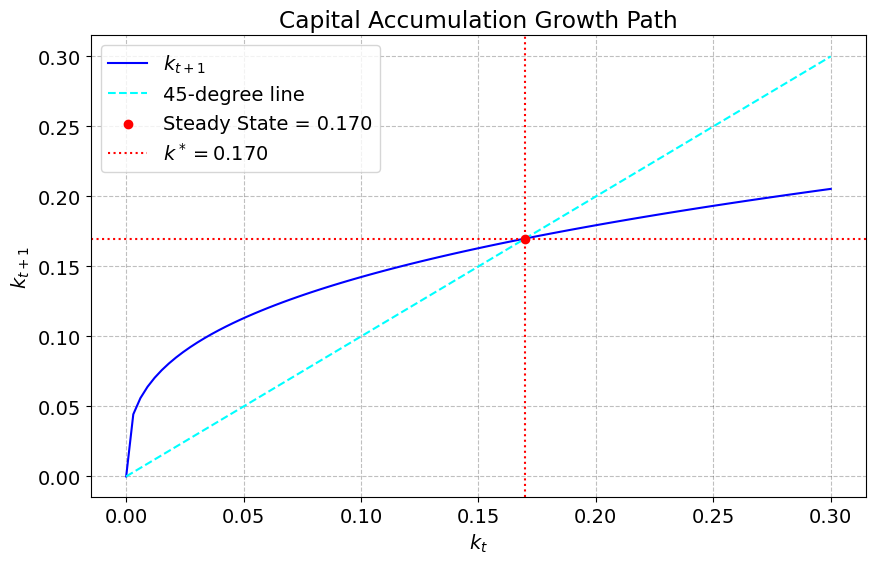

In [8]:
# Parameters
A = 1.0  # Total factor productivity
alpha = 1/3  # Capital share in production
rho = 0.05  # Discount rate
n = 0.06  # Population growth rate

# Define symbols for symbolic computation
alpha_sym, rho_sym, k_sym, n_sym, A_sym = sm.symbols('alpha rho k n A')

# Define the steady state equation
ss_eq = sm.Eq(k_sym, (A_sym * (1 - alpha_sym) * k_sym**alpha_sym) / ((1 + n_sym) * (2 + rho_sym)))

# Solve for steady state capital per capita symbolically
ss_solve = sm.solve(ss_eq, k_sym)[0]

# Convert the solution to a numerical function
k_solve = sm.lambdify((alpha_sym, rho_sym, n_sym, A_sym), ss_solve)

# Calculate steady state capital per capita with given parameter values
k_star = k_solve(alpha, rho, n, A)
print(f'Steady state capital per capita: {k_star:.3f}')

# Define the objective function for numerical solution
def obj(k):
    return k - (A * (1 - alpha) * k**alpha) / ((1 + n) * (2 + rho))

# Optimize the model and find the roots
result = root_scalar(obj, bracket=[1e-10, 10], method='bisect')
k_star_numerical = result.root
print(f'Numerical steady state capital per capita: {k_star_numerical:.3f}')

# Simulate the model
periods = 50
k_path = np.zeros(periods)
k_path[0] = 0.1  # Initial capital per capita

for t in range(1, periods):
    k_path[t] = (A * (1 - alpha) * k_path[t-1]**alpha) / ((1 + n) * (2 + rho))

# Plot the capital accumulation growth path
k_vals = np.linspace(0, 0.3, 100)
k_next_vals = (A * (1 - alpha) * k_vals**alpha) / ((1 + n) * (2 + rho))

plt.figure(figsize=(10, 6))
plt.plot(k_vals, k_next_vals, label='$k_{t+1}$', color='blue')
plt.plot(k_vals, k_vals, label='45-degree line', color='cyan', linestyle='--')
plt.scatter(k_star, k_star, color='red', zorder=5, label=f'Steady State = {k_star:.3f}')
plt.axvline(x=k_star, color='red', linestyle=':', label=f'$k^* = {k_star:.3f}$')
plt.axhline(y=k_star, color='red', linestyle=':')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Capital Accumulation Growth Path')
plt.legend()
plt.grid(True)
plt.show()


# Model expansion

#### Effect of Implementing a Pay-As-You-Go (PAYG) System

In this section, we will adopt a different approach to solve the model by examining the PAYG system. Here’s a brief explanation of the PAYG system:

In a PAYG system, the government collects contributions \( d_t \) from the current young population and distributes them as benefits to the current old population:
$$
b_t = (1 + n) d_t
$$

Assuming contributions are a fixed fraction of wages (\( d_t = \tau w_t \)), the budget constraints for the young and old are given by:
$$
c_{1t} + s_t + d_t = w_t
$$
for the young, and:
$$
c_{2t+1} = (1 + r_{t+1}) s_t + (1 + n) d_{t+1}
$$
for the old.

The Euler equation remains unchanged as the contributions are taken as given. Savings can be expressed as:
$$
s_t = (1 + n) k_{t+1}
$$

We can derive the closed-form expression for individual savings:
$$
s_t = \frac{1}{2 + \rho} \left[ (w_t - d_t) - \frac{1 + \rho}{r_{t+1}} (1 + n) d_{t+1} \right]
$$

Similarly, the equilibrium expression for \( k_{t+1} \) is:
$$
k_{t+1} = \frac{1}{1 + \frac{1 + \rho}{2 + \rho} \frac{(1 - \alpha)}{\alpha} \tau} \left( \frac{1}{(1 + n)(2 + \rho)} (1 - \tau) w_t \right)
$$


Steady state capital per capita without PAYG: 0.181
Steady state capital per capita with PAYG: 0.115


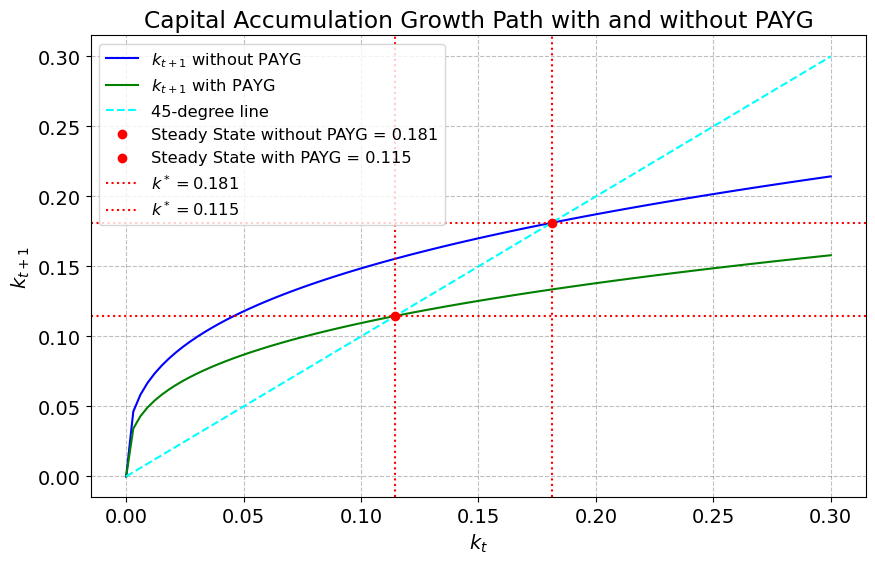

In [11]:
# Parameters
A = 1.0  # Total factor productivity
alpha = 1/3  # Capital share in production
beta = 0.96  # Discount factor
rho = (1 / beta) - 1  # Discount rate
n = 0.02  # Population growth rate
tau = 0.15  # PAYG tax rate

# Production function
def production_function(k):
    return A * k ** alpha

# Wage function
def wage_function(k):
    return A * (1 - alpha) * k ** alpha

# Capital accumulation function without PAYG
def capital_accumulation_without_PAYG(k):
    return (A * (1 - alpha) * k ** alpha) / ((1 + n) * (2 + rho))

# Capital accumulation function with PAYG
def capital_accumulation_with_PAYG(k):
    w = wage_function(k)
    return (A * (1 - alpha) * (1 - tau) * k ** alpha) / ((1 + n) * (2 + rho) * (1 + ((1 + rho) / (2 + rho)) * ((1 - alpha) / alpha) * tau))

# Objective function for numerical solution
def obj_without_PAYG(k):
    return k - capital_accumulation_without_PAYG(k)

def obj_with_PAYG(k):
    return k - capital_accumulation_with_PAYG(k)

# Find the steady states
k_star_without_PAYG = root_scalar(obj_without_PAYG, bracket=[1e-10, 10], method='bisect').root
k_star_with_PAYG = root_scalar(obj_with_PAYG, bracket=[1e-10, 10], method='bisect').root

print(f'Steady state capital per capita without PAYG: {k_star_without_PAYG:.3f}')
print(f'Steady state capital per capita with PAYG: {k_star_with_PAYG:.3f}')

# Simulate the model
periods = 50
k_path_without_PAYG = np.zeros(periods)
k_path_with_PAYG = np.zeros(periods)
k_path_without_PAYG[0] = 0.1  # Initial capital per capita
k_path_with_PAYG[0] = 0.1  # Initial capital per capita

for t in range(1, periods):
    k_path_without_PAYG[t] = capital_accumulation_without_PAYG(k_path_without_PAYG[t-1])
    k_path_with_PAYG[t] = capital_accumulation_with_PAYG(k_path_with_PAYG[t-1])

# Plot the capital accumulation growth path
k_vals = np.linspace(0, 0.3, 100)
k_next_vals_without_PAYG = capital_accumulation_without_PAYG(k_vals)
k_next_vals_with_PAYG = capital_accumulation_with_PAYG(k_vals)

plt.figure(figsize=(10, 6))
plt.plot(k_vals, k_next_vals_without_PAYG, label='$k_{t+1}$ without PAYG', color='blue')
plt.plot(k_vals, k_next_vals_with_PAYG, label='$k_{t+1}$ with PAYG', color='green')
plt.plot(k_vals, k_vals, label='45-degree line', color='cyan', linestyle='--')
plt.scatter(k_star_without_PAYG, k_star_without_PAYG, color='red', zorder=5, label=f'Steady State without PAYG = {k_star_without_PAYG:.3f}')
plt.scatter(k_star_with_PAYG, k_star_with_PAYG, color='red', zorder=5, label=f'Steady State with PAYG = {k_star_with_PAYG:.3f}')
plt.axvline(x=k_star_without_PAYG, color='red', linestyle=':', label=f'$k^* = {k_star_without_PAYG:.3f}$')
plt.axvline(x=k_star_with_PAYG, color='red', linestyle=':', label=f'$k^* = {k_star_with_PAYG:.3f}$')
plt.axhline(y=k_star_without_PAYG, color='red', linestyle=':')
plt.axhline(y=k_star_with_PAYG, color='red', linestyle=':')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Capital Accumulation Growth Path with and without PAYG')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


In this example, we assumed the distribution rate to be 35% of wages. However, this distribution rate can vary across all levels between 0 and 1. In the interactive figure below, we allow the tax rate to range from 0 to 1. The result shows that a higher distribution rate (tax) leads to a lower level of capital in the steady state.

We have now seen that the both the contribution from young to old and population growth have a negative effect on accumulation of capital. 

Next up we want to examine the convergence itself. We will consider an economy where the population growth is positive and negative (5%), respectively, and see how the convergence will happen. 

Steady state capital per capita (n = 0.05): 0.173
Steady state capital per capita (n = 0.1): 0.162
Steady state capital per capita (n = -0.05): 0.202


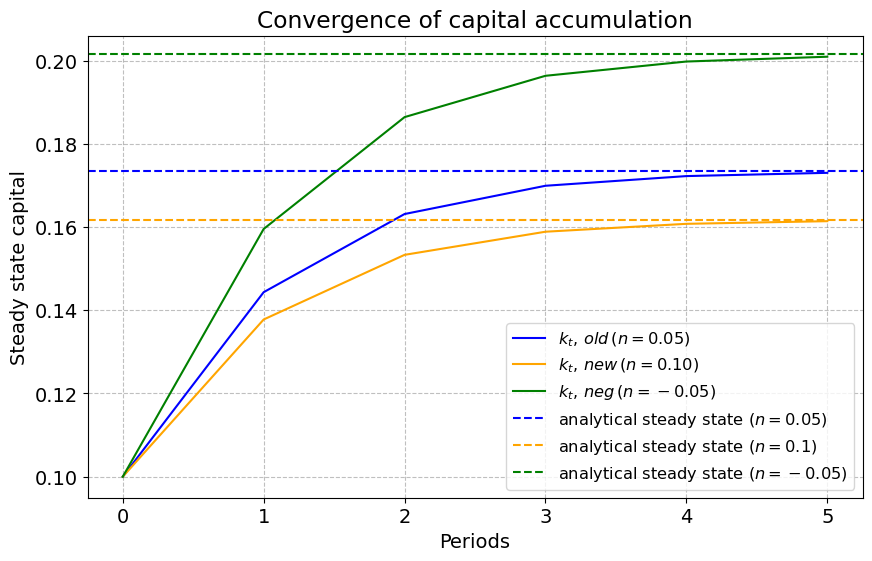

In [12]:
# Parameters
A = 1.0  # Total factor productivity
alpha = 1/3  # Capital share in production
beta = 0.96  # Discount factor
rho = (1 / beta) - 1  # Discount rate
n_old = 0.05  # Original population growth rate
n_new = 0.10  # New population growth rate
n_neg = -0.05  # Negative population growth rate

# Production function
def production_function(k):
    return A * k ** alpha

# Capital accumulation function
def capital_accumulation(k, n):
    return (A * (1 - alpha) * k ** alpha) / ((1 + n) * (2 + rho))

# Objective function for numerical solution
def obj(k, n):
    return k - capital_accumulation(k, n)

# Find the steady states
k_star_old = root_scalar(obj, args=(n_old,), bracket=[1e-10, 10], method='bisect').root
k_star_new = root_scalar(obj, args=(n_new,), bracket=[1e-10, 10], method='bisect').root
k_star_neg = root_scalar(obj, args=(n_neg,), bracket=[1e-10, 10], method='bisect').root

print(f'Steady state capital per capita (n = {n_old}): {k_star_old:.3f}')
print(f'Steady state capital per capita (n = {n_new}): {k_star_new:.3f}')
print(f'Steady state capital per capita (n = {n_neg}): {k_star_neg:.3f}')

# Simulate the model
periods = 6
k_path_old = np.zeros(periods)
k_path_new = np.zeros(periods)
k_path_neg = np.zeros(periods)
k_path_old[0] = 0.1  # Initial capital per capita
k_path_new[0] = 0.1  # Initial capital per capita
k_path_neg[0] = 0.1  # Initial capital per capita

for t in range(1, periods):
    k_path_old[t] = capital_accumulation(k_path_old[t-1], n_old)
    k_path_new[t] = capital_accumulation(k_path_new[t-1], n_new)
    k_path_neg[t] = capital_accumulation(k_path_neg[t-1], n_neg)

# Plot the capital accumulation growth path
plt.figure(figsize=(10, 6))
t = np.arange(periods)
plt.plot(t, k_path_old, label=r'$k_t, \, old \, (n = 0.05)$', color='blue')
plt.plot(t, k_path_new, label=r'$k_t, \, new \, (n = 0.10)$', color='orange')
plt.plot(t, k_path_neg, label=r'$k_t, \, neg \, (n = -0.05)$', color='green')
plt.axhline(k_star_old, color='blue', linestyle='--', label=f'analytical steady state $(n = {n_old})$')
plt.axhline(k_star_new, color='orange', linestyle='--', label=f'analytical steady state $(n = {n_new})$')
plt.axhline(k_star_neg, color='green', linestyle='--', label=f'analytical steady state $(n = {n_neg})$')
plt.xlabel('Periods')
plt.ylabel('Steady state capital')
plt.title('Convergence of capital accumulation')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


The graph demonstrates the impact of different population growth rates on capital accumulation. For a moderate population growth rate (n = 0.05), the economy converges to a steady-state capital per capita of approximately 0.17. A higher population growth rate (n = 0.10) results in a lower steady-state capital per capita of around 0.15 due to increased resource demands. Conversely, a negative population growth rate (n = -0.05) leads to a higher steady-state capital per capita of approximately 0.21, as fewer resources are needed for the declining population. These results underscore the significant influence of population dynamics on capital accumulation and economic stability.


# Conclusion



We demonstrate that it is possible to determine the steady-state level of capital accumulation in an OLG model both numerically and analytically. Our analysis shows that the baseline model achieves a steady state of approximately 0.169. By extending the model to include a PAYG system, we observe a reduced level of capital accumulation, attributed to the lower disposable income for the young generation. Additionally, we varied the population growth rates, revealing a negative relationship between population growth and capital accumulation.